<a href="https://colab.research.google.com/github/suyeonb/AI_lab_baesuyeon/blob/main/week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


=== 095522039.m4a ===


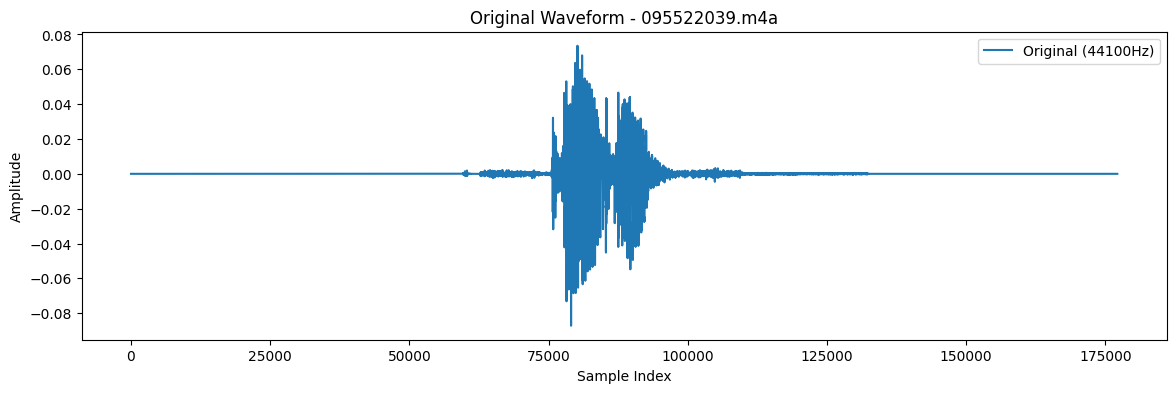

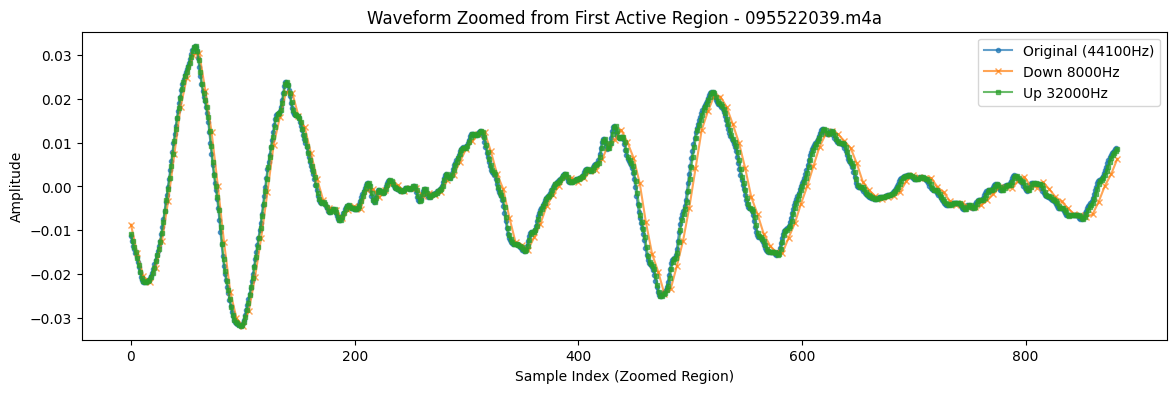

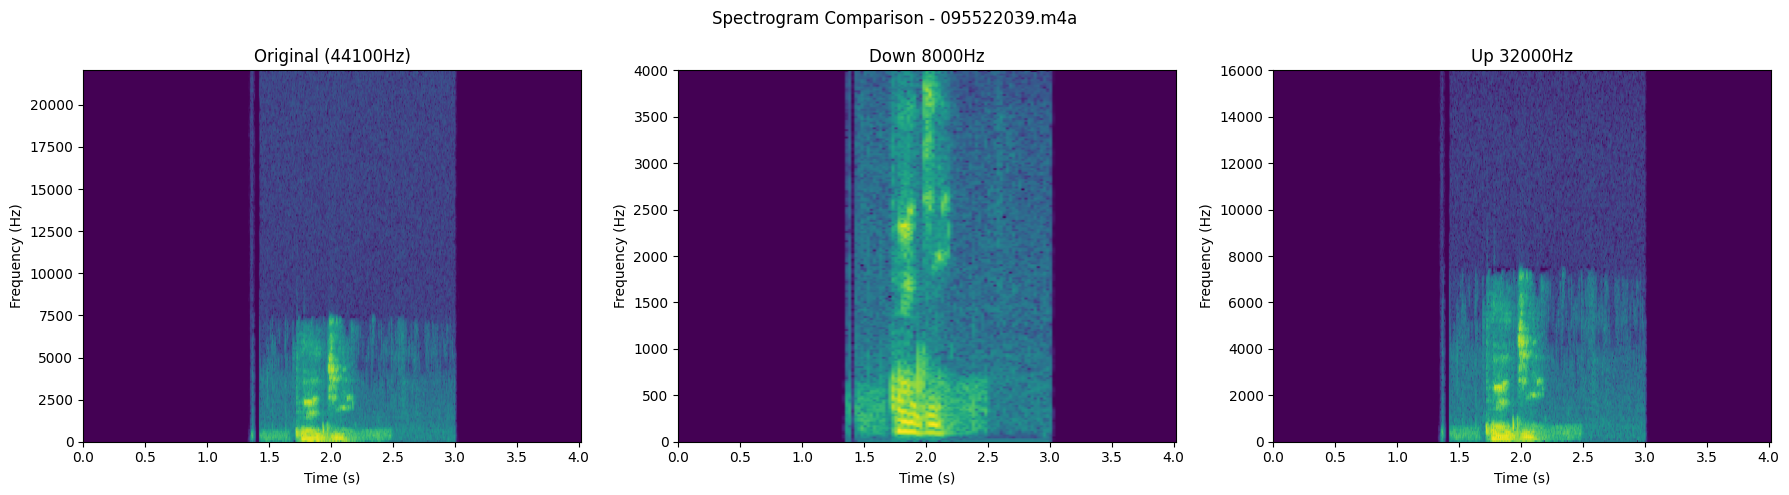


=== 095522040.m4a ===


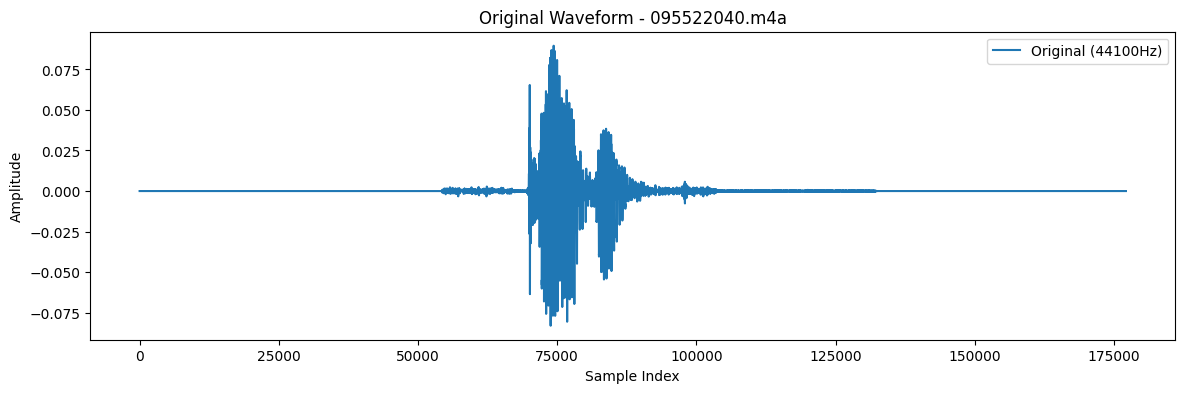

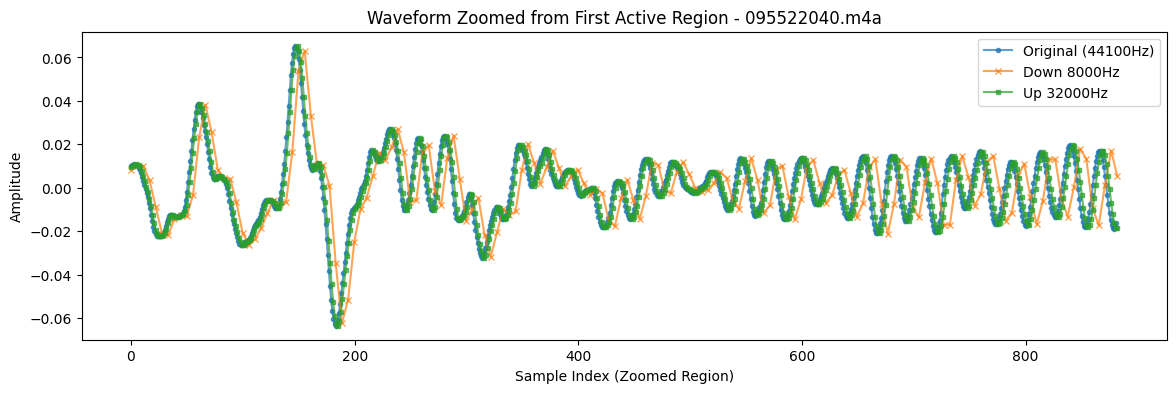

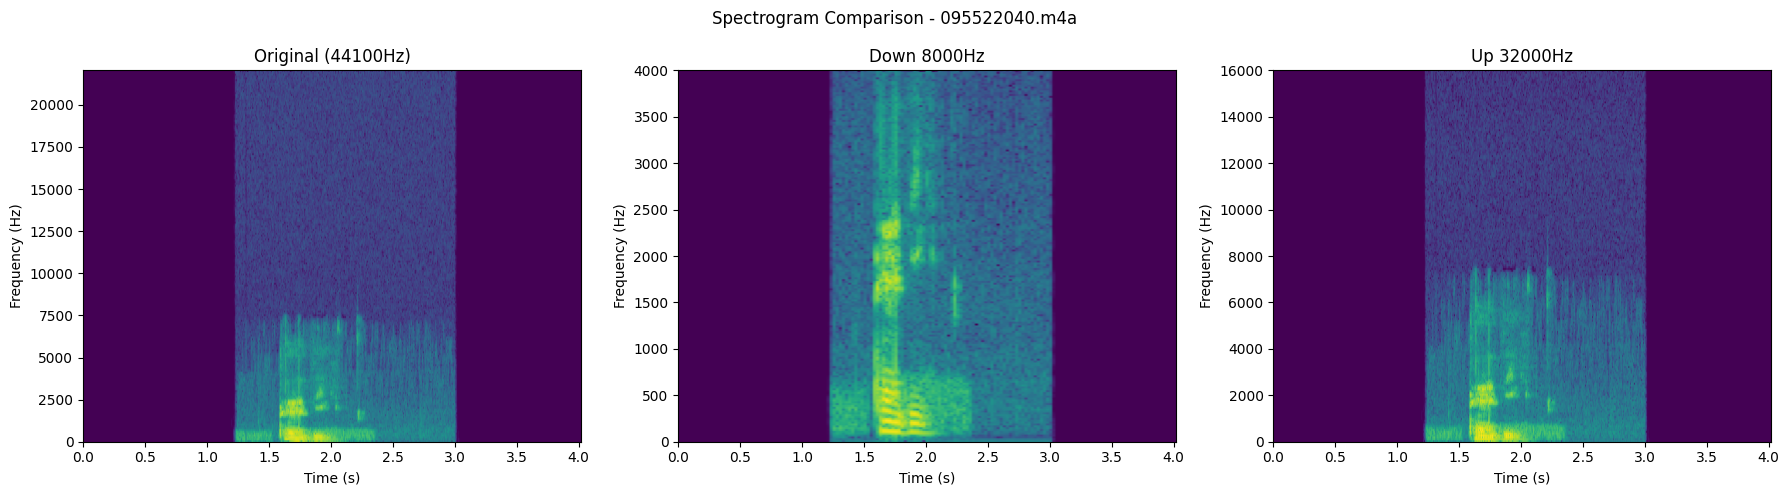


=== 095522041.m4a ===


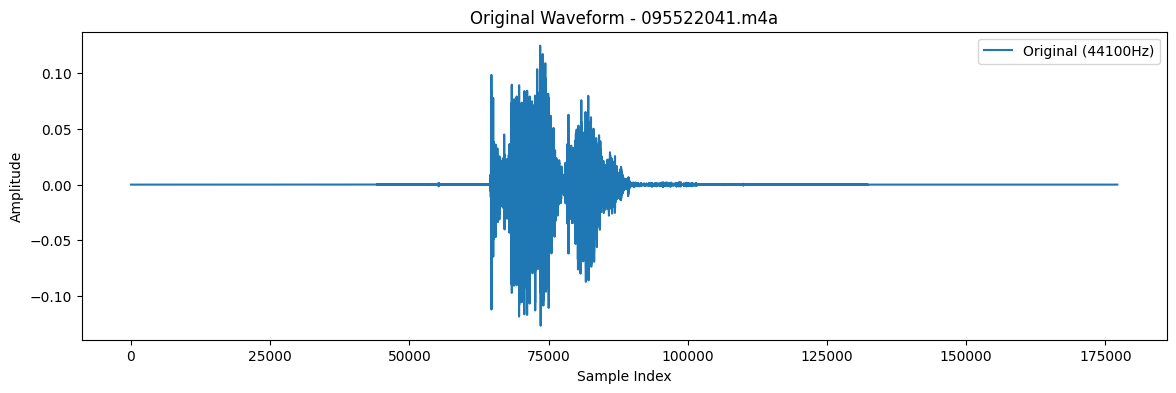

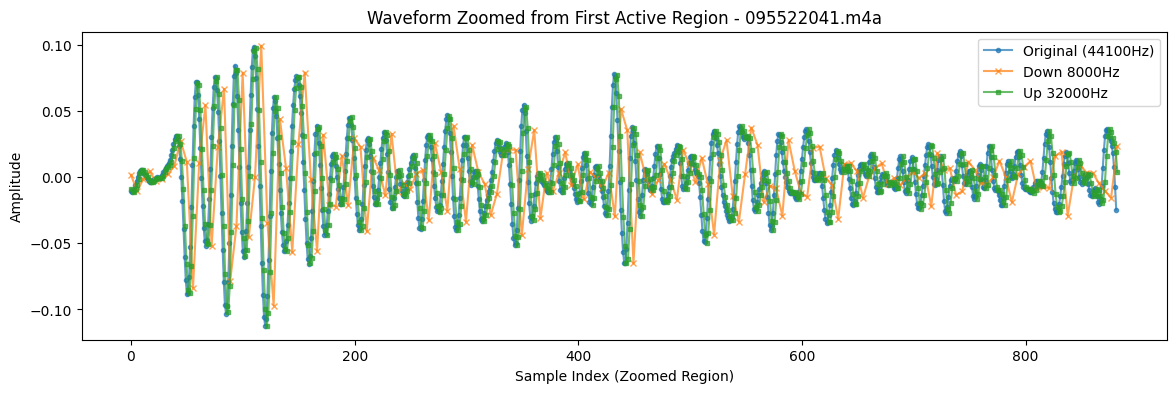

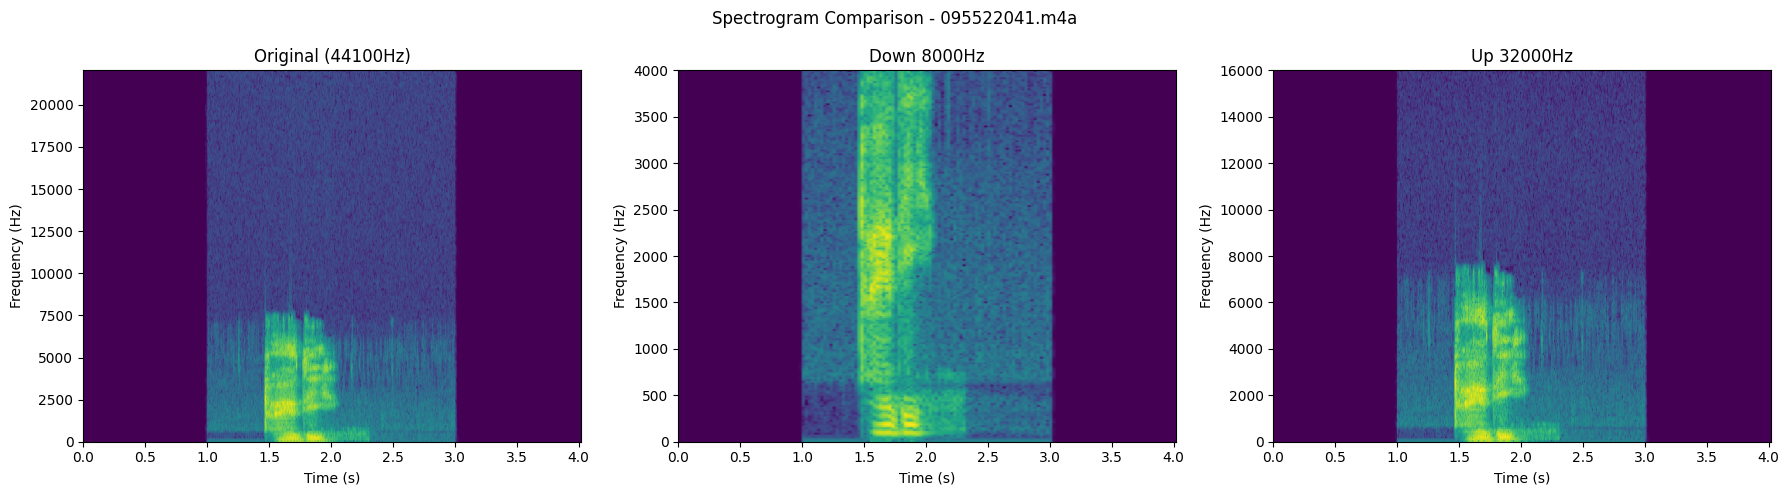


=== 095522042.m4a ===


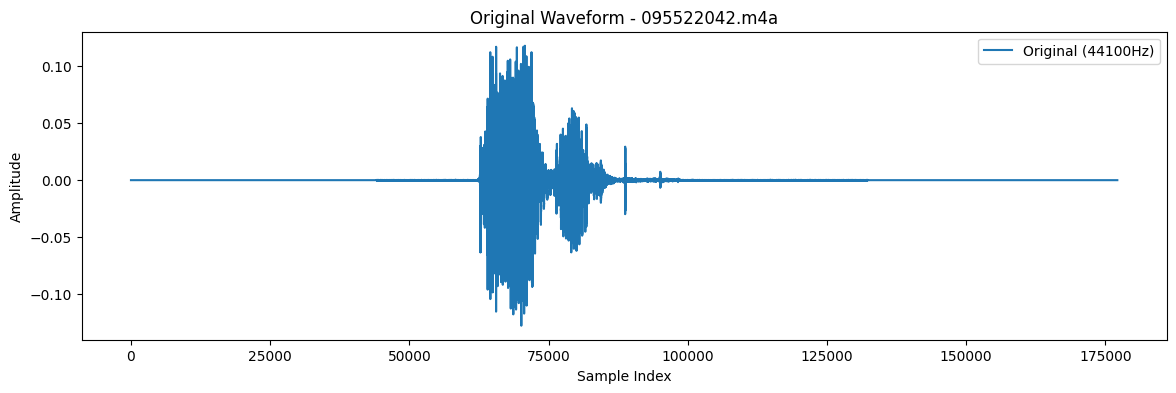

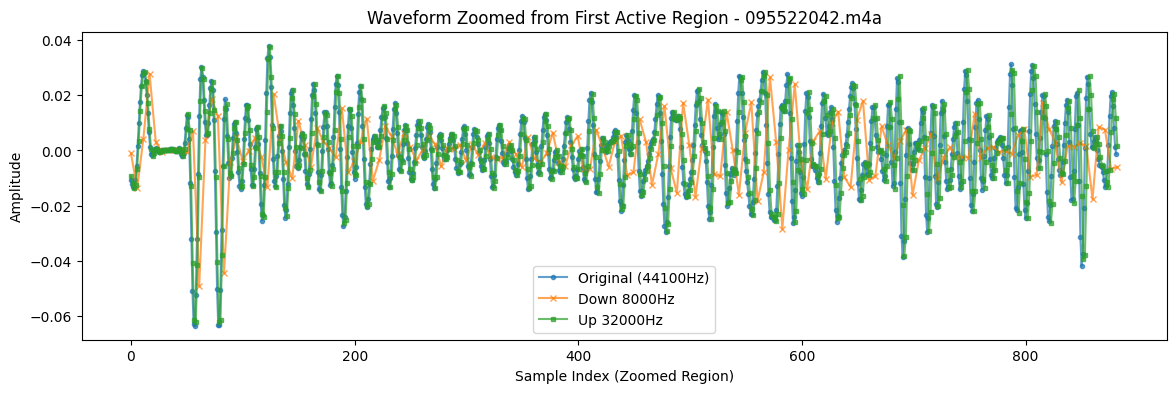

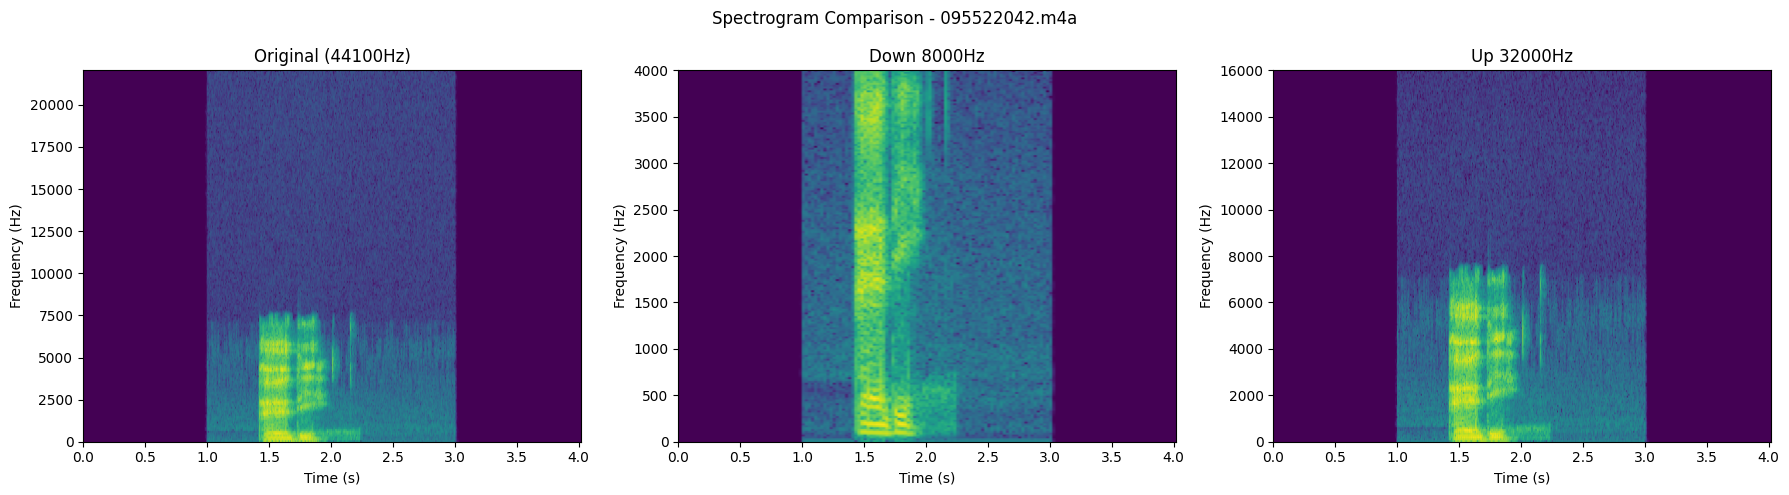

In [13]:
import torch
import torchaudio
import torchaudio.transforms as T
import matplotlib.pyplot as plt

# 분석할 파일 목록
files = ["095522039.m4a", "095522040.m4a", "095522041.m4a", "095522042.m4a"]

# 타겟 샘플레이트
target_down = 8000
target_up = 32000

for fname in files:
    print(f"\n=== {fname} ===")
    waveform, sr = torchaudio.load(fname)

    # 리샘플링
    down_transform = T.Resample(sr, target_down)
    up_transform = T.Resample(sr, target_up)
    waveform_down = down_transform(waveform)
    waveform_up = up_transform(waveform)

    # 1 원본 Waveform 전체
    plt.figure(figsize=(14, 4))
    plt.plot(waveform[0].numpy(), label=f"Original ({sr}Hz)")
    plt.title(f"Original Waveform - {fname}")
    plt.xlabel("Sample Index")
    plt.ylabel("Amplitude")
    plt.legend()
    plt.show()

    # 2 Waveform 비교 (소리 나는 부분부터 확대)
    # 에너지가 큰 지점 찾기
    energy = waveform[0].pow(2).numpy()
    start_idx = int((energy > 1e-4).argmax())  # 처음 소리 시작 위치
    zoom_len = sr // 50   # 약 20ms 구간만 확대

    plt.figure(figsize=(14, 4))
    # 원본
    plt.plot(range(zoom_len),
             waveform[0][start_idx:start_idx+zoom_len].numpy(),
             'o-', label=f"Original ({sr}Hz)", markersize=3, alpha=0.7)
    # 다운샘플
    plt.plot(torch.linspace(0, zoom_len, steps=len(waveform_down[0][start_idx*target_down//sr:start_idx*target_down//sr+zoom_len*target_down//sr])).numpy(),
             waveform_down[0][start_idx*target_down//sr:start_idx*target_down//sr+zoom_len*target_down//sr].numpy(),
             'x-', label=f"Down {target_down}Hz", markersize=4, alpha=0.7)
    # 업샘플
    plt.plot(torch.linspace(0, zoom_len, steps=len(waveform_up[0][start_idx*target_up//sr:start_idx*target_up//sr+zoom_len*target_up//sr])).numpy(),
             waveform_up[0][start_idx*target_up//sr:start_idx*target_up//sr+zoom_len*target_up//sr].numpy(),
             's-', label=f"Up {target_up}Hz", markersize=3, alpha=0.7)

    plt.title(f"Waveform Zoomed from First Active Region - {fname}")
    plt.xlabel("Sample Index (Zoomed Region)")
    plt.ylabel("Amplitude")
    plt.legend()
    plt.show()

    # 3 Spectrogram 비교
    fig, axs = plt.subplots(1, 3, figsize=(18, 5))

    def plot_spec(ax, data, sr, title):
        spec = T.Spectrogram()(data)
        ax.imshow(10 * torch.log10(spec + 1e-10).numpy()[0],
                  origin="lower", aspect="auto",
                  extent=[0, data.shape[1]/sr, 0, sr/2])
        ax.set_title(title)
        ax.set_xlabel("Time (s)")
        ax.set_ylabel("Frequency (Hz)")

    plot_spec(axs[0], waveform, sr, f"Original ({sr}Hz)")
    plot_spec(axs[1], waveform_down, target_down, f"Down {target_down}Hz")
    plot_spec(axs[2], waveform_up, target_up, f"Up {target_up}Hz")

    plt.suptitle(f"Spectrogram Comparison - {fname}")
    plt.tight_layout()
    plt.show()
